# Online Payment Fraud Detection 

In [2]:
#Importing libraries for data preprocessing 

import numpy as np
import pandas as pd

In [3]:
#Dataset overview 

df = pd.read_csv('fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
#Converting categorical values into machine readable code

df['type'] = df['type'].astype('category').cat.codes
df = df.drop(['isFlaggedFraud'], axis = 1)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [5]:
#Correlation analysis

corr = df.corr()
#corr

In [6]:
#Data visualisation

from matplotlib import pyplot as plt
import seaborn as sns

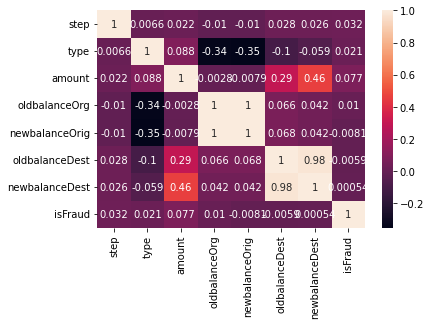

In [7]:
#Heatmap correlation plot

sns.heatmap(corr, annot=True)
plt.show()

In [8]:
#Dropping features with very low correlation to the output

df = df.drop(['newbalanceDest'], axis=1)

In [9]:
#Converting sender and reciever name as index to retain the information without discarding it

df = df.reset_index()
df = df.set_index(['nameOrig', 'nameDest'])
df

,,index,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFraud
nameOrig,nameDest,,,,,,,,
C1231006815,M1979787155,0,1,3,9839.64,170136.00,160296.36,0.00,0
C1666544295,M2044282225,1,1,3,1864.28,21249.00,19384.72,0.00,0
C1305486145,C553264065,2,1,4,181.00,181.00,0.00,0.00,1
C840083671,C38997010,3,1,1,181.00,181.00,0.00,21182.00,1
C2048537720,M1230701703,4,1,3,11668.14,41554.00,29885.86,0.00,0
...,...,...,...,...,...,...,...,...,...
C786484425,C776919290,6362615,743,1,339682.13,339682.13,0.00,0.00,1
C1529008245,C1881841831,6362616,743,4,6311409.28,6311409.28,0.00,0.00,1
C1162922333,C1365125890,6362617,743,1,6311409.28,6311409.28,0.00,68488.84,1


In [10]:
#Dropping old index

df = df.drop(['index'], axis = 1)

In [11]:
#Describing the summary statistics of data

df.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.714150e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.290820e-03
std,1.423320e+02,1.350117e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,0.000000e+00
75%,3.350000e+02,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,0.000000e+00
max,7.430000e+02,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,1.000000e+00


In [12]:
#Checking class imbalance

count = pd.DataFrame(df['isFraud'].value_counts())
count

,isFraud
0,6354407
1,8213


In [13]:
#Plotting class imbalance

sns.set_style('white')

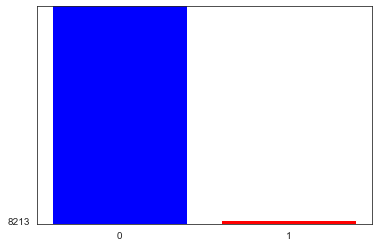

In [14]:
plt.bar(count.index, count['isFraud'], color=['blue', 'red'])
plt.xticks(count.index)
plt.yticks(count['isFraud'])
plt.ylim(0,500000)
plt.show()

In [28]:
#Importing libraries for model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [15]:
#Data overview

y = df['isFraud']
y

nameOrig     nameDest   
C1231006815  M1979787155    0
C1666544295  M2044282225    0
C1305486145  C553264065     1
C840083671   C38997010      1
C2048537720  M1230701703    0
                           ..
C786484425   C776919290     1
C1529008245  C1881841831    1
C1162922333  C1365125890    1
C1685995037  C2080388513    1
C1280323807  C873221189     1
Name: isFraud, Length: 6362620, dtype: int64

In [16]:
X = df.drop(['isFraud'], axis=1)
X

,,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest
nameOrig,nameDest,,,,,,
C1231006815,M1979787155,1,3,9839.64,170136.00,160296.36,0.00
C1666544295,M2044282225,1,3,1864.28,21249.00,19384.72,0.00
C1305486145,C553264065,1,4,181.00,181.00,0.00,0.00
C840083671,C38997010,1,1,181.00,181.00,0.00,21182.00
C2048537720,M1230701703,1,3,11668.14,41554.00,29885.86,0.00
...,...,...,...,...,...,...,...
C786484425,C776919290,743,1,339682.13,339682.13,0.00,0.00
C1529008245,C1881841831,743,4,6311409.28,6311409.28,0.00,0.00
C1162922333,C1365125890,743,1,6311409.28,6311409.28,0.00,68488.84


In [17]:
#Handling class imbalance

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [18]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest
0,1,3,9.839640e+03,1.701360e+05,160296.36,0.000000e+00
1,1,3,1.864280e+03,2.124900e+04,19384.72,0.000000e+00
2,1,4,1.810000e+02,1.810000e+02,0.00,0.000000e+00
3,1,1,1.810000e+02,1.810000e+02,0.00,2.118200e+04
4,1,3,1.166814e+04,4.155400e+04,29885.86,0.000000e+00
...,...,...,...,...,...,...
12708809,136,1,6.845928e+05,6.845928e+05,0.00,3.027473e+06
12708810,606,4,1.593918e+06,1.593918e+06,0.00,0.000000e+00
12708811,597,1,4.539979e+05,4.539979e+05,0.00,1.319452e+06
12708812,80,4,2.351811e+05,2.351811e+05,0.00,0.000000e+00


In [23]:
#Creating train_test_split datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [29]:
#Prediction model

log = LogisticRegression(C=a).fit(X_train, y_train)
y_pred2 = log.predict(X_test)
print("Classification reports for regularisation parameter a =",a, "is\n", classification_report(y_test, y_pred2), 'Accuracy score is: ' ,accuracy_score(y_test, y_pred2),'\n')

Classification reports for regularisation parameter a = 10 is
               precision    recall  f1-score   support

           0       0.89      0.93      0.91   1587918
           1       0.93      0.89      0.91   1589286

    accuracy                           0.91   3177204
   macro avg       0.91      0.91      0.91   3177204
weighted avg       0.91      0.91      0.91   3177204
 Accuracy score is:  0.9094077685915037 



In [34]:
#Cross validation scores

print("Cross validation scores are:", cross_val_score(log, X, y, cv = 3))

Cross validation scores are: [0.86404792 0.91963947 0.93843807]


In [35]:
#Hence, we have created an online payment fraud detection model that determines whether a given transaction is fraud or not.